[*********************100%***********************]  1 of 1 completed

Epoch 1/50


17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0619
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0072
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0034
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0034
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0028
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0035
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0027
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0026
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0024
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0028
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0026
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023
Epoch 15/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022
Epoch 16/50
17/

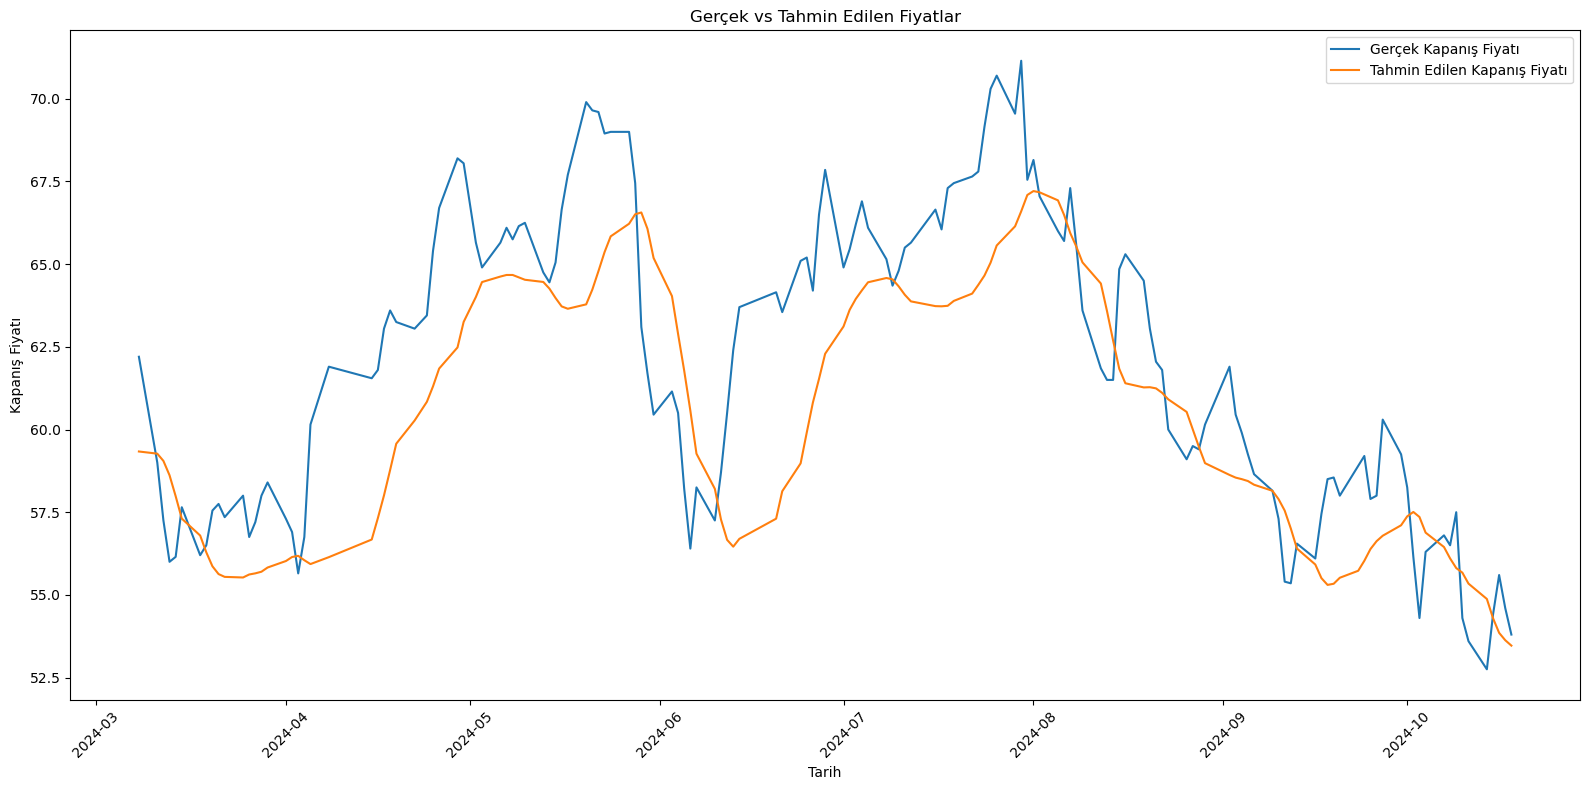

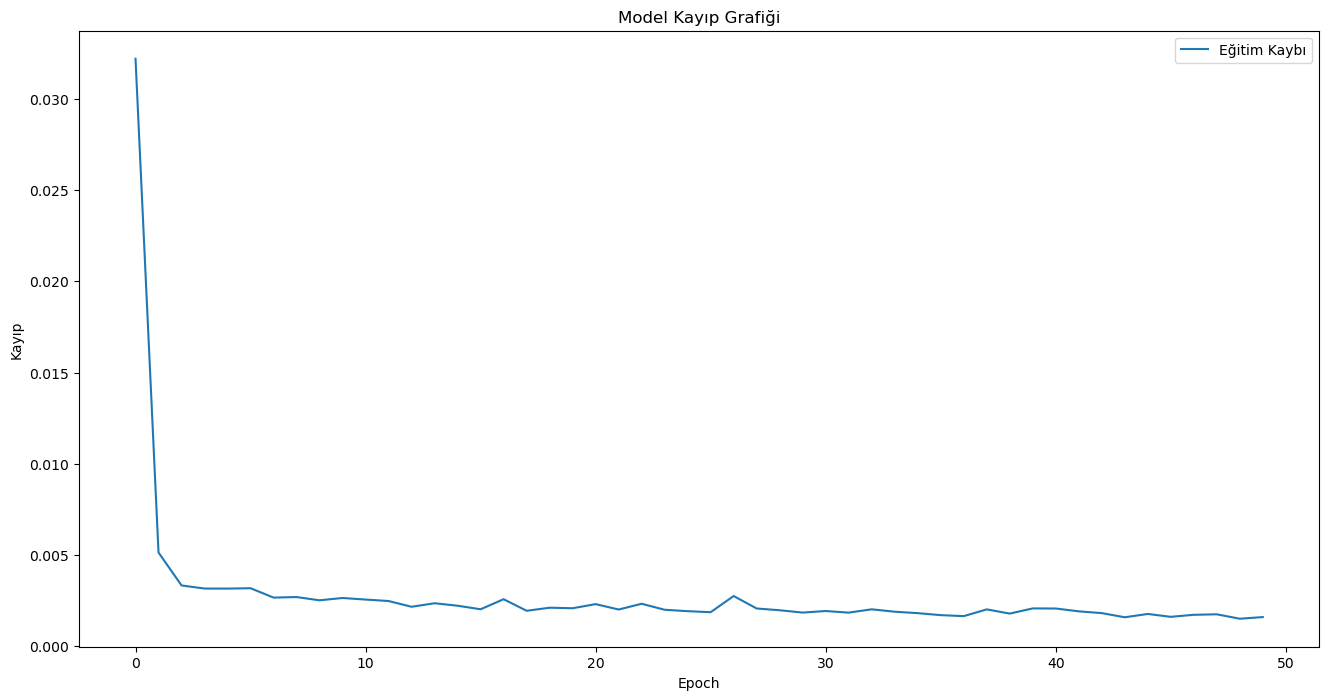

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

In [ ]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from datetime import datetime, timedelta

# Tarih değişkenlerini tanımlama
start_date = "2024-01-20"
end_date = "2024-10-29"

# Hisse senedi verisini çekme
hisse = 'TUPRS.IS'
kapanis_fiyatlari = yf.download(hisse, start=start_date, end=end_date)['Close']

# Kapanış fiyatlarını numpy array'e çevirme
veri_degeri = kapanis_fiyatlari.values

# Veriyi ölçeklendirme
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(veri_degeri.reshape(-1, 1))

# Eğitim ve test setlerini ayırma
train_data_len = int(np.ceil(len(scaled_data) * 0.8))
train_data = scaled_data[0:train_data_len, :]
test_data = scaled_data[train_data_len-60:, :]

# Zaman serisi verisi oluşturma
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Veriyi numpy array'e çevirme
x_train, y_train = np.array(x_train), np.array(y_train)

# Veriyi RNN'e uygun formatta yeniden şekillendirme
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Modeli oluşturma
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Modeli derleme
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitme
history = model.fit(x_train, y_train, batch_size=16, epochs=20)

# Test verisini hazırlama
x_test = []
y_test = veri_degeri[train_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Test seti için tahminler yapma
tahminler = model.predict(x_test)
tahminler = scaler.inverse_transform(tahminler)

# Sonuçları görselleştirme
plt.figure(figsize=(16, 8))
gercek_tarihler = kapanis_fiyatlari.index[train_data_len:]
plt.plot(gercek_tarihler, veri_degeri[train_data_len:], label='Gerçek Kapanış Fiyatı')
plt.plot(gercek_tarihler, tahminler, label='Tahmin Edilen Kapanış Fiyatı')

plt.title('Gerçek vs Tahmin Edilen Fiyatlar')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Eğitim kaybını ve doğruluğunu görselleştirme
plt.figure(figsize=(16, 8))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.title('Model Kayıp Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

# Gelecekteki fiyat tahminlerini hesaplama
def gelecekteki_tahminler(model, son_veri, gun_sayisi):
    tahminler = []
    son_veri = son_veri.reshape((1, son_veri.shape[0], 1))
    for _ in range(gun_sayisi):
        tahmin = model.predict(son_veri)
        tahminler.append(tahmin[0][0])
        son_veri = np.append(son_veri[:, 1:, :], np.array([[tahmin[0][0]]]).reshape((1, 1, 1)), axis=1)
    return scaler.inverse_transform(np.array(tahminler).reshape(-1, 1))

# Son 60 günün verisi
son_60_gun = scaled_data[-60:]
gunler = [1, 30]
tahmin_sonuc = {}

# Tahminleri hesapla
for g in gunler:
    tahmin_sonuc[g] = gelecekteki_tahminler(model, son_60_gun, g)

tahmin_30_gun = tahmin_sonuc[30]

# 1. günün end_date'den sonraki gün olarak belirlenmesi
tahmin_baslangic_tarihi = datetime.strptime(end_date, "%Y-%m-%d") + timedelta(days=1)

# Tahmin tarihlerini oluşturma (5 gün aralıklarla)
tahmin_tarihleri = [tahmin_baslangic_tarihi + timedelta(days=i*5) for i in range(6)]

# Tahmin grafiğini çizme
plt.figure(figsize=(10, 5))
plt.plot(tahmin_tarihleri, tahmin_30_gun[::5], label='30 Günlük Tahmin Fiyatları')
plt.title('30 Günlük Tahmin Fiyatları')
plt.xlabel('Tarih')
plt.ylabel('Tahmin Edilen Kapanış Fiyatı (TL)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

# Son kapanış fiyatını yazdırma
son_kapanis_fiyati = kapanis_fiyatlari.iloc[-1]
print(f"{hisse} En son kapanış fiyatı: {son_kapanis_fiyati:.2f} TL")

# Tahmin fiyatlarını yazdırma
for g in gunler:
    tarih = (datetime.now() + timedelta(days=g)).strftime("%Y-%m-%d")
    fiyat = tahmin_sonuc[g][-1][0]
    yuzde_degisim = ((fiyat - son_kapanis_fiyati) / son_kapanis_fiyati) * 100
    print(f"{g} gün sonra ({tarih}) tahmini fiyat: {fiyat:.2f} TL, değişim: {yuzde_degisim:.2f}%")

# RSI Hesaplama
def RSI(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI.iloc[-1]

rsi_degeri = RSI(kapanis_fiyatlari[-14:])
print(f"RSI: {rsi_degeri:.2f}")

# Günlük tahmin fiyatını RSI'ye göre güncelleme
etki_orani = 0.05
g = 1  # Sadece birinci günün tahminini alıyoruz
fiyat = tahmin_sonuc[g][-1][0]

# Günlük fiyat güncellemesi
if rsi_degeri < 30:
    guncellenmis_fiyat = fiyat * 1.03
elif rsi_degeri > 70:
    guncellenmis_fiyat = fiyat * 0.97
elif 30 <= rsi_degeri <= 50:
    guncellenmis_fiyat = fiyat * (1 + ((rsi_degeri - 30) / 20) * 0.03)
elif 50 < rsi_degeri <= 70:
    guncellenmis_fiyat = fiyat * (1 - ((rsi_degeri - 50) / 20) * 0.03)

print(f"1 gün sonra RSI'ye göre güncellenmiş tahmini fiyat: {guncellenmis_fiyat:.2f} TL")

# Aylık tahmin fiyatını RSI'ye göre güncelleme
g = 30  # Sadece 30 gün verisini alıyoruz
fiyat = tahmin_sonuc[g][-1][0]

# Aylık fiyat güncellemesi
if rsi_degeri < 30:
    aylik_guncellenmis_fiyat = fiyat * 1.05
elif rsi_degeri > 70:
    aylik_guncellenmis_fiyat = fiyat * 0.95
elif 30 <= rsi_degeri <= 50:
    aylik_guncellenmis_fiyat = fiyat * (1 + ((rsi_degeri - 30) / 20) * 0.05)
elif 50 < rsi_degeri <= 70:
    aylik_guncellenmis_fiyat = fiyat * (1 - ((rsi_degeri - 50) / 20) * 0.05)

tarih = (datetime.now() + timedelta(days=g)).strftime("%Y-%m-%d")
print(f"{g} gün sonra aylık RSI'ye göre güncellenmiş tahmini fiyat: {aylik_guncellenmis_fiyat:.2f} TL")